# Инициализация подключаемых модулей и загрузка данных

In [197]:
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
#добавим ещё одну библиотеку для графиков
import seaborn as sns
#изменим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 3, 2 #8, 5

In [198]:
df = pd.read_csv('C:\work\Churn_logreg-19480-4db098.csv', sep=';', encoding='cp1251')

In [199]:
df.head(5)

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,"27,09",0,"39,74",Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680,Остается
1,NaN,0,"46,31",Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,"37111,5",Остается
2,"23,76",0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,"37079,4",Остается
3,"9,4",NaN,"13,9",Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997,Остается
4,"14,15",0,"108,43",Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,"16829,6",Остается


# Первичный анализ данных

In [200]:
df.shape

(4431, 12)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null object
internat    4427 non-null object
local       4428 non-null object
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null object
churn       4431 non-null object
dtypes: float64(2), object(10)
memory usage: 415.5+ KB


In [202]:
# судя по всему задача оттока оператора связи. звонки и платежи преобразуем в тип float
for i in ['longdist', 'internat','local','income']:
    if i in df.columns:
        df[i]=df[i].str.replace(',', '.').astype('float')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null float64
internat    4427 non-null float64
local       4428 non-null float64
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null float64
churn       4431 non-null object
dtypes: float64(6), object(6)
memory usage: 415.5+ KB


In [204]:
df.describe()

,longdist,internat,local,age,children,income
count,4430.000000,4427.000000,4428.000000,4428.000000,4430.000000,4430.000000
mean,13.638023,0.835044,51.361093,57.562331,0.988939,50296.423896
std,9.393025,2.233639,54.685012,22.832404,0.824448,28439.435264
min,0.000000,0.000000,0.050000,18.000000,0.000000,110.280000
25%,5.170000,0.000000,13.460000,38.000000,0.000000,25445.600000
50%,13.680000,0.000000,35.010000,58.000000,1.000000,50290.700000
75%,22.080000,0.000000,71.660000,77.000000,2.000000,75004.500000
max,29.980000,9.950000,450.620000,97.000000,2.000000,99832.900000


In [205]:
df.describe(include=['object'])

,int_disc,billtype,pay,gender,marital,churn
count,4430,4427,4429,4430,4427,4431
unique,2,2,4,2,2,2
top,Нет,Бюджетный,CC,Женский,Женат,Остается
freq,3054,2244,2561,2244,2625,2496


# Дополним пропуски 

In [206]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
for c in categorical_columns:
    print(df[c].value_counts(dropna=False, normalize=True))

Нет    0.689235
Да     0.310539
NaN    0.000226
Name: int_disc, dtype: float64
Бюджетный     0.506432
Бесплатный    0.492665
NaN           0.000903
Name: billtype, dtype: float64
CC      0.577973
CH      0.220492
Auto    0.200632
CD      0.000451
NaN     0.000451
Name: pay, dtype: float64
Женский    0.506432
Мужской    0.493342
NaN        0.000226
Name: gender, dtype: float64
Женат       0.592417
Одинокий    0.406680
NaN         0.000903
Name: marital, dtype: float64
Остается    0.563304
Уходит      0.436696
Name: churn, dtype: float64


In [207]:
#Заменим категорию CD модой, т.е. значением CC
df.at[df['pay'] == 'CD', 'pay'] = 'CC'

In [208]:
train=df.sample(frac=0.7,random_state=200)
test=df.drop(train.index)

In [209]:
train.isnull().sum()

longdist    1
internat    4
local       2
int_disc    0
billtype    4
pay         2
age         2
gender      1
marital     3
children    1
income      1
churn       0
dtype: int64

In [210]:
cols = ['longdist','internat','local','income','age','children']
for c in cols:
    train[c].fillna(train[c].median(), inplace=True)
    test[c].fillna(train[c].median(), inplace=True)

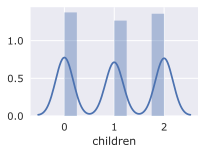

In [211]:
sns.distplot(train.children)
#очевидно, что эту переменную стоит сделать категориальной
train.children = train.children.astype('int').astype('str')
test.children = test.children.astype('int').astype('str')


In [212]:
categorical_columns.append('children')
categorical_columns

['int_disc', 'billtype', 'pay', 'gender', 'marital', 'churn', 'children']

In [213]:
cols.remove('children')
cols

['longdist', 'internat', 'local', 'income', 'age']

In [214]:
for c in categorical_columns:
    train[c] = train[c].fillna(train[c].mode()[0])
    test[c] = test[c].fillna(train[c].mode()[0])       

In [215]:
train.isnull().sum()

longdist    0
internat    0
local       0
int_disc    0
billtype    0
pay         0
age         0
gender      0
marital     0
children    0
income      0
churn       0
dtype: int64

In [216]:
test.isnull().sum()

longdist    0
internat    0
local       0
int_disc    0
billtype    0
pay         0
age         0
gender      0
marital     0
children    0
income      0
churn       0
dtype: int64

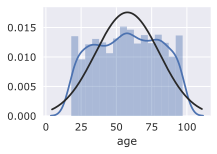

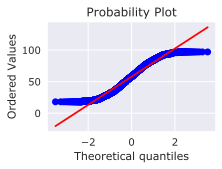

In [217]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train.age, fit=norm)
fig = plt.figure()
res = stats.probplot(train.age, plot=plt)

In [218]:
#Посмотрим коэффициент ассиметрии 
train.age.skew()

-0.027431021407872375

In [219]:
#и коэффициент эксцесса
train.age.kurtosis()

-1.1324713450026518

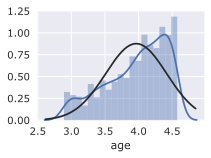

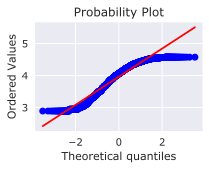

In [220]:
#Логарифмическое преобразование
a=0.001
sns.distplot(np.log(train.age+a), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train.age+a), plot=plt)

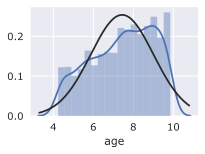

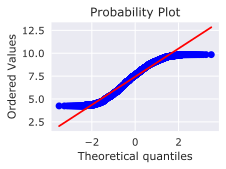

In [221]:
#преобразование квадратным корнем
sns.distplot(np.sign(train.age) * (train.age.abs()**(1/2)), fit=norm);
fig = plt.figure()
res = stats.probplot(np.sign(train.age) * (train.age.abs()**(1/2)), plot=plt)

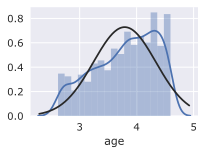

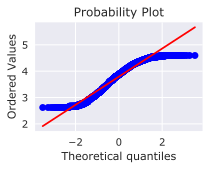

In [222]:
#преобразование кубическим корнем
sns.distplot(np.sign(train.age) * (train.age.abs()**(1/3)), fit=norm);
fig = plt.figure()
res = stats.probplot(np.sign(train.age) * (train.age.abs()**(1/3)), plot=plt)

In [223]:
from scipy.stats import boxcox
transformed, lam = boxcox(train.age)
print("Lambda: %f" % lam)

Lambda: 0.801115


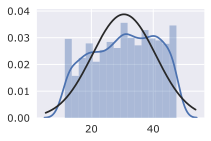

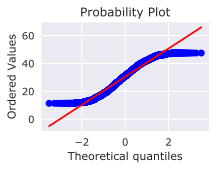

In [224]:
sns.distplot(transformed, fit = norm);
fig = plt.figure()
res = stats.probplot(transformed, plot = plt)

In [225]:
for w in cols:
    #print(train[w])
    trans_train, lam = boxcox(train[w]+a)
    trans_test = boxcox(test[w]+a, lam)
    print("feature: " + w + " lambda: " + str(lam))
    train[w] = trans_train
    test[w] = trans_test

feature: longdist lambda: 0.457667656941
feature: internat lambda: -0.704429517024
feature: local lambda: 0.232119128849
feature: income lambda: 0.727054582721
feature: age lambda: 0.801116750595


# Разбиение по диапазонам (биннинг)

In [226]:
decil = []
for i in range(1,10):
    decil.append(i/10)
print(train['income'].describe(percentiles=decil))

count    3102.000000
mean     3468.488983
std      1562.100735
min        40.643274
10%      1220.598328
20%      1905.201541
30%      2547.427619
40%      3124.873576
50%      3601.681763
60%      4044.309037
70%      4517.841845
80%      5067.254682
90%      5515.631430
max      5930.306192
Name: income, dtype: float64


In [244]:
#Попробуем сделать биннинг переменной income
#Зададим границы для категорий переменной income_categ, которая будет инициализирована на основе income
w = train['income'].describe(decil) 
bins = w[3:14]
train['income_categ'] = pd.cut(train.income, bins)
test['income_categ'] = pd.cut(test.income, bins)

In [245]:
#Таблица сопряжённости категорий дохода и признака churn
cross_tab = pd.crosstab(train['income_categ'], train['churn'])
print(cross_tab)

churn                 Остается  Уходит
income_categ                          
(40.643, 1220.598]         151     158
(1220.598, 1905.202]       181     129
(1905.202, 2547.428]       156     156
(2547.428, 3124.874]       177     131
(3124.874, 3601.682]       179     159
(3601.682, 4044.309]       169     115
(4044.309, 4517.842]       193     115
(4517.842, 5067.255]       180     131
(5067.255, 5515.631]       168     141
(5515.631, 5930.306]       193     118


In [246]:
#Оценим weight of evidence для категорий переменной income_categ
def WoE(biv):
    a = 0.0001
    ret = np.log((1.0*biv['Остается']/sum(biv['Остается'])+a) / (1.0*biv['Уходит']/sum(biv['Уходит'])+a))
    return(ret)
WoE(cross_tab)

income_categ
(40.643, 1220.598]     -0.300591
(1220.598, 1905.202]    0.083025
(1905.202, 2547.428]   -0.255323
(2547.428, 3124.874]    0.045331
(3124.874, 3601.682]   -0.136969
(3601.682, 4044.309]    0.129248
(4044.309, 4517.842]    0.261911
(4517.842, 5067.255]    0.062122
(5067.255, 5515.631]   -0.080291
(5515.631, 5930.306]    0.236189
dtype: float64

In [249]:
def IV(biv):
    b = (1.0*biv['Остается']/sum(biv['Остается'])+a) 
    c = (1.0*biv['Уходит']/sum(biv['Уходит'])+a)
    ret = (b-c)*np.log(b / c)
    return(ret)
IV(cross_tab)

income_categ
(40.643, 1220.598]      0.009040
(1220.598, 1905.202]    0.000680
(1905.202, 2547.428]    0.006581
(2547.428, 3124.874]    0.000202
(3124.874, 3601.682]    0.002045
(3601.682, 4044.309]    0.001503
(4044.309, 4517.842]    0.006612
(4517.842, 5067.255]    0.000382
(5067.255, 5515.631]    0.000640
(5515.631, 5930.306]    0.005444
dtype: float64

In [250]:
sum(IV(cross_tab))

0.03312898223490484

In [231]:
#Вычислим information value:
def calc_IV(df): 
    iv_list = [] 
    col_list = []
    a = 0.0001
    for var_name in df:
        if var_name != "churn":
            biv = pd.crosstab(df[var_name],df["churn"])        
            v_IV = sum(IV(biv))
            iv_list.append(v_IV)
            col_list.append(var_name)
    results = pd.DataFrame({'Название переменной' : col_list,'IV' : iv_list})
    results['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                             if x <= 0.5 and x > 0.3 else 'Средняя'
                             if x <= 0.3 and x > 0.1 else 'Слабая' 
                             if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                             for x in results['IV']]  # по Наиму Сиддики
    return(results.sort_values(by = 'IV', ascending = False))

In [251]:
calc_IV(train)

,IV,Название переменной,Полезность
0,1.914579,longdist,Подозрительно высокая
10,1.806323,income,Подозрительно высокая
2,1.802017,local,Подозрительно высокая
7,1.026895,gender,Подозрительно высокая
6,0.482972,age,Сильная
13,0.452465,local_categ,Сильная
1,0.407646,internat,Сильная
12,0.111282,age_categ,Средняя
11,0.033129,income_categ,Слабая
9,0.008669,children,Бесполезная


In [233]:
for c in ['age', 'local','income']:
    w = train[c].describe(decil) 
    bins = w[3:14]
    train[c + '_categ'] = pd.cut(train[c], bins)
    test[c + '_categ'] = pd.cut(test[c], bins)
    cross_tab = pd.crosstab(train[c + '_categ'], train['churn'])
    #print("cross_tab:")
    #print(cross_tab)
    print("WoE:")
    print(WoE(cross_tab))
    #calc_IV(cross_tab)
    print("IV:")
    print(IV(cross_tab))
    print("IV sum: " + str(sum(IV(cross_tab))))

WoE:
age_categ
(11.397, 15.729]   -0.388352
(15.729, 19.8]      0.704728
(19.8, 23.824]      0.571011
(23.824, 27.877]   -0.198710
(27.877, 31.038]   -0.008543
(31.038, 34.124]   -0.158820
(34.124, 37.571]   -0.081262
(37.571, 40.944]   -0.327641
(40.944, 44.25]    -0.110589
(44.25, 47.498]     0.087785
dtype: float64
IV:
age_categ
(11.397, 15.729]    0.013960
(15.729, 19.8]      0.048046
(19.8, 23.824]      0.028622
(23.824, 27.877]    0.004191
(27.877, 31.038]    0.000008
(31.038, 34.124]    0.002417
(34.124, 37.571]    0.000672
(37.571, 40.944]    0.011457
(40.944, 44.25]     0.001165
(44.25, 47.498]     0.000745
dtype: float64
IV sum: 0.111282087933
WoE:
local_categ
(-2.149, 1.841]   -2.251792
(1.841, 3.115]     0.180084
(3.115, 3.933]     0.174784
(3.933, 4.758]     0.188305
(4.758, 5.455]     0.387426
(5.455, 6.162]     0.298048
(6.162, 6.819]    -0.056079
(6.819, 7.609]     0.265193
(7.609, 8.68]      0.354128
(8.68, 13.487]     0.060240
dtype: float64
IV:
local_categ
(-2.149, 1

In [234]:
calc_IV(train)

,IV,Название переменной,Полезность
0,1.914579,longdist,Подозрительно высокая
10,1.806323,income,Подозрительно высокая
2,1.802017,local,Подозрительно высокая
7,1.026895,gender,Подозрительно высокая
6,0.482972,age,Сильная
13,0.452465,local_categ,Сильная
1,0.407646,internat,Сильная
12,0.111282,age_categ,Средняя
11,0.033129,income_categ,Слабая
9,0.008669,children,Бесполезная


# Кодирование one-by-hot

In [237]:
# выполняем дамми-кодирование
#train.info()
train_dummies = pd.get_dummies(train)
train_dummies.info()
#test.info()
test_dummies = pd.get_dummies(test)
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2157 to 4105
Data columns (total 51 columns):
longdist                             3102 non-null float64
internat                             3102 non-null float64
local                                3102 non-null float64
age                                  3102 non-null float64
income                               3102 non-null float64
int_disc_Да                          3102 non-null uint8
int_disc_Нет                         3102 non-null uint8
billtype_Бесплатный                  3102 non-null uint8
billtype_Бюджетный                   3102 non-null uint8
pay_Auto                             3102 non-null uint8
pay_CC                               3102 non-null uint8
pay_CH                               3102 non-null uint8
gender_Женский                       3102 non-null uint8
gender_Мужской                       3102 non-null uint8
marital_Женат                        3102 non-null uint8
marital_Одинокий         

In [239]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'churn_Уходит']
y_test = test_dummies.loc[:, 'churn_Уходит']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
train_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
test_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies
X_test = test_dummies

In [240]:
# строим логистическую регрессию на данных,
# отмасштабированных с помощью RobustScaler
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression().fit(X_train, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.890
AUC на контрольной выборке: 0.886


In [241]:
#Попробуем масштабировать признаки перед обучением модели и оценим результаты 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Создадим экземпляры классов
scalers = []
scalers.append(StandardScaler())
scalers.append(RobustScaler())
scalers.append(MinMaxScaler())
for scaler in scalers:
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        logreg = LogisticRegression().fit(X_train_scaled, y_train)
        print(scaler)
        print("AUC на обучающей выборке: {:.3f}". format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
        print("AUC на контрольной выборке: {:.3f}". format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

StandardScaler(copy=True, with_mean=True, with_std=True)
AUC на обучающей выборке: 0.891
AUC на контрольной выборке: 0.886
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)
AUC на обучающей выборке: 0.891
AUC на контрольной выборке: 0.887
MinMaxScaler(copy=True, feature_range=(0, 1))
AUC на обучающей выборке: 0.891
AUC на контрольной выборке: 0.886


In [242]:
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)
c_values = np.logspace(0.0001, 100, 10)
from sklearn.linear_model import LogisticRegressionCV
logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, penalty ='l2', verbose=1, n_jobs=-1)
logit_searcher.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


LogisticRegressionCV(Cs=array([  1.00023e+000,   1.29181e+011,   1.66840e+022,   2.15477e+033,
         2.78292e+044,   3.59418e+055,   4.64195e+066,   5.99515e+077,
         7.74283e+088,   1.00000e+100]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=10, random_state=17, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=-1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=1)

In [243]:
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logit_searcher.predict_proba(X_test_scaled)[:, 1])))

AUC на контрольной выборке: 0.886
